# QOSF Mentorship Program Task 2

## Description

<p style='text-align: justify;'> 
Implement a circuit that returns |01> and |10> with equal probability. 

Requirements :The circuit should consist only of CNOTs, RXs and RYs. 

Start from all parameters in parametric gates being equal to 0 or randomly chosen. You should find the right set of parameters using gradient descent (you can use more advanced optimization methods if you like). 
    
Simulations must be done with sampling (i.e. a limited number of measurements per iteration) and noise. 

Compare the results for different numbers of measurements: 1, 10, 100, 1000. 

Bonus question:
How to make sure you produce state |01> + |10> and not |01> - |10> ?

(Actually for more careful readers, the “correct” version of this question is posted below:
How to make sure you produce state  |01⟩  +  |10⟩  and not any other combination of |01> + e(i*phi)|10⟩ (for example |01⟩  -  |10⟩)?)
</p> 

## My work

The task tells us that we need to create a two-qubit Bell State of $\frac{1}{\sqrt(2)}(|01> + |10>)$ and not $\frac{1}{\sqrt(2)}|01> - |10>$.

Analytically, I try to caculate how to get to the state. I make use of the Qiksit to verfiy if my calculation is correct.

Numerically, we need the following:
1. two qubits: $q_0, q_1$
2. a set of operations on $R_x, R_y, CNOT$ only
3. Initial parameters for the gates $R_x, R_y$ corresponding to their parameters: thetaRx, thetaRy
4. A circuit that applies the operations to thte qubits: circuit
5. A simulator that runs the circuit fora specified numbdr of repetitions: reps, simulator

We introdue coding Gradient Descent on Task 2 for optimized parametrized circuit using pennyLane.


We have imported a variety of packages for the below coding.

### Updated version of PennyLane for circuit drawer

In [1]:
pip install git+https://www.github.com/XanaduAI/pennylane

  Cloning https://www.github.com/XanaduAI/pennylane to /private/var/folders/8_/4ft2d3hn4x78_qp1dxhvkfkw0000gp/T/pip-req-build-so3rxwzd
  Running command git clone -q https://www.github.com/XanaduAI/pennylane /private/var/folders/8_/4ft2d3hn4x78_qp1dxhvkfkw0000gp/T/pip-req-build-so3rxwzd
  Created wheel for PennyLane: filename=PennyLane-0.12.0.dev0-py3-none-any.whl size=379412 sha256=d9597b9abacb4e12dd6df4c33bb71c53397e785e12cbfff56668a4337dd0547c
  Stored in directory: /private/var/folders/8_/4ft2d3hn4x78_qp1dxhvkfkw0000gp/T/pip-ephem-wheel-cache-_ojrqo1j/wheels/32/61/33/bd8b8097944427dc715a31ff9c5eba18c2675e5e971ef48fcd
Successfully built PennyLane
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


### Importing Packages

In [3]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit import execute, Aer, BasicAer
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram, plot_state_city, circuit_drawer
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.quantum_info import state_fidelity

import pennylane as qml 
from pennylane import numpy as np

import scipy as sp
from scipy.optimize import minimize 

from math import pi
import random
import itertools
import os
from IPython.display import SVG, display
from typing import List, Union, Sequence, Dict, Optional

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

# Bell State 1

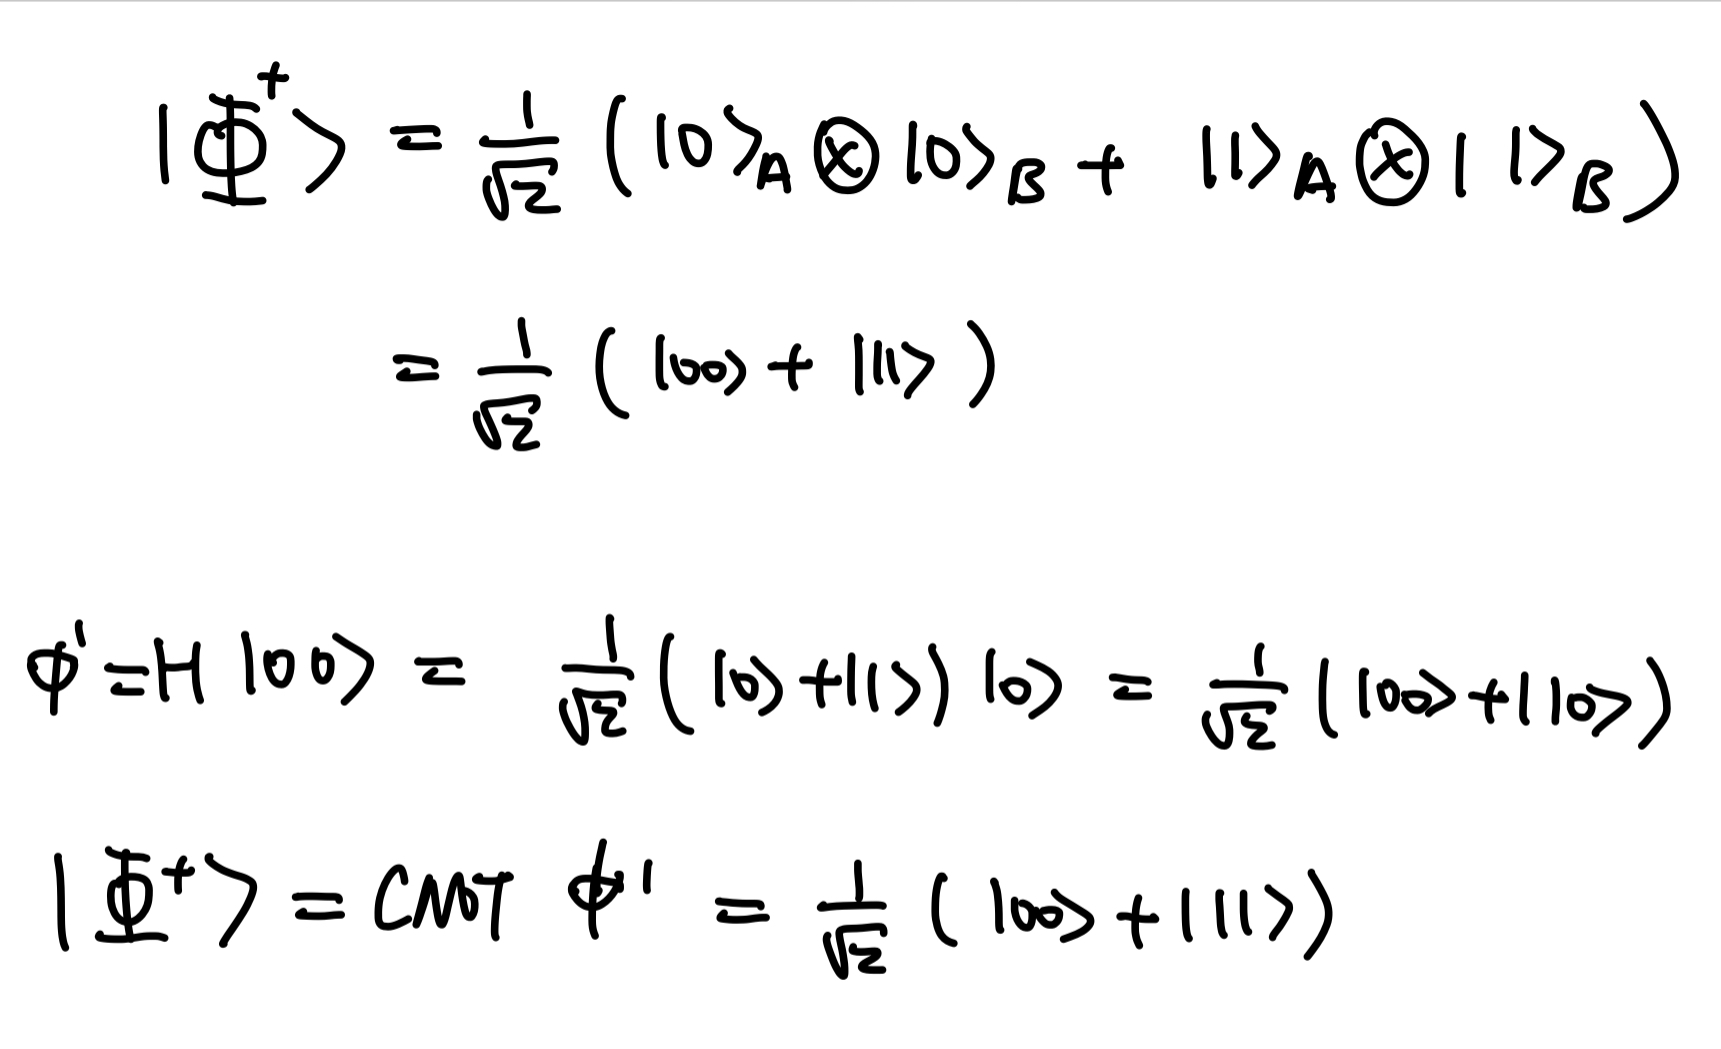

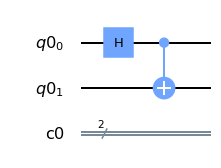

In [4]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.draw(output = 'mpl')

In [5]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()

In [6]:
print(out)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


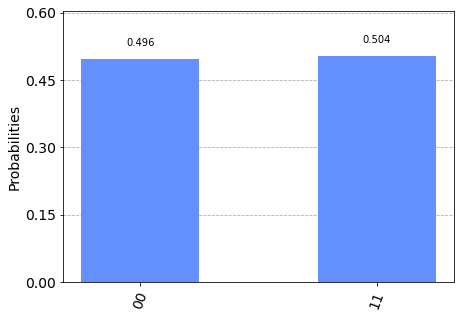

In [7]:
qc.measure(qr,cr)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend).result()
plot_histogram(job.get_counts(qc))

# Bell State 2

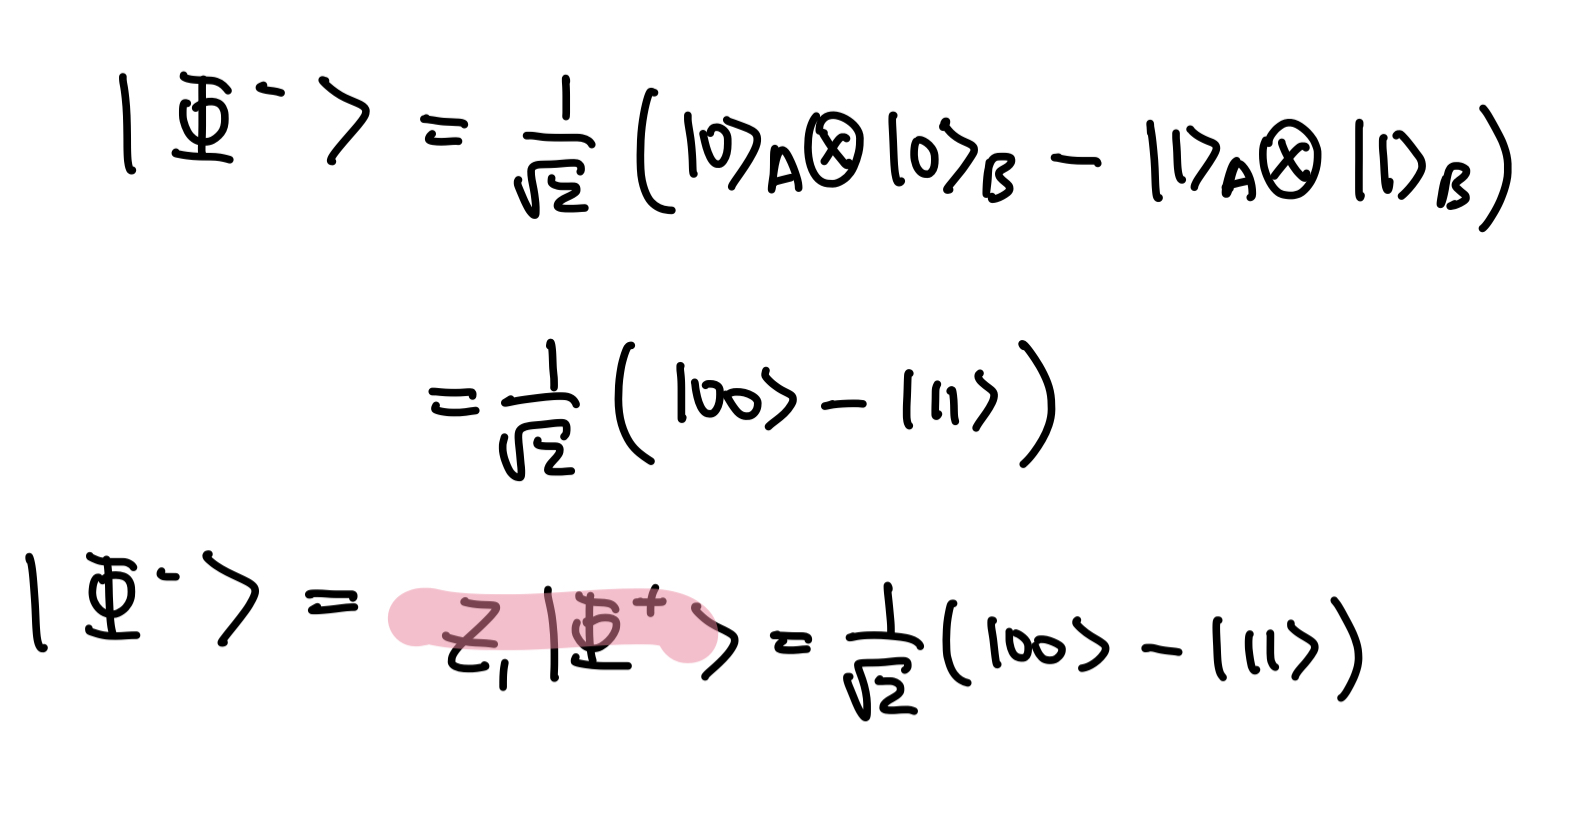

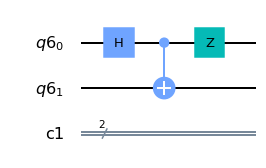

In [8]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.z(qr[0])
qc.draw(output = 'mpl')

In [9]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()

In [10]:
print(out)

[ 0.70710678+0.j -0.        +0.j  0.        +0.j -0.70710678+0.j]


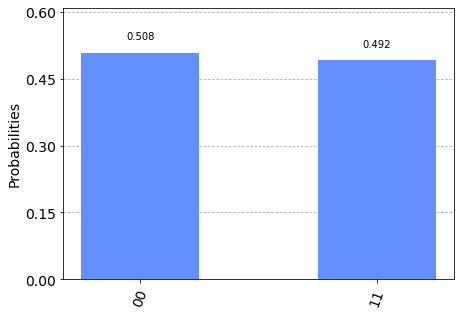

In [11]:
qc.measure(qr,cr)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend).result()
plot_histogram(job.get_counts(qc))

# Bell State 3

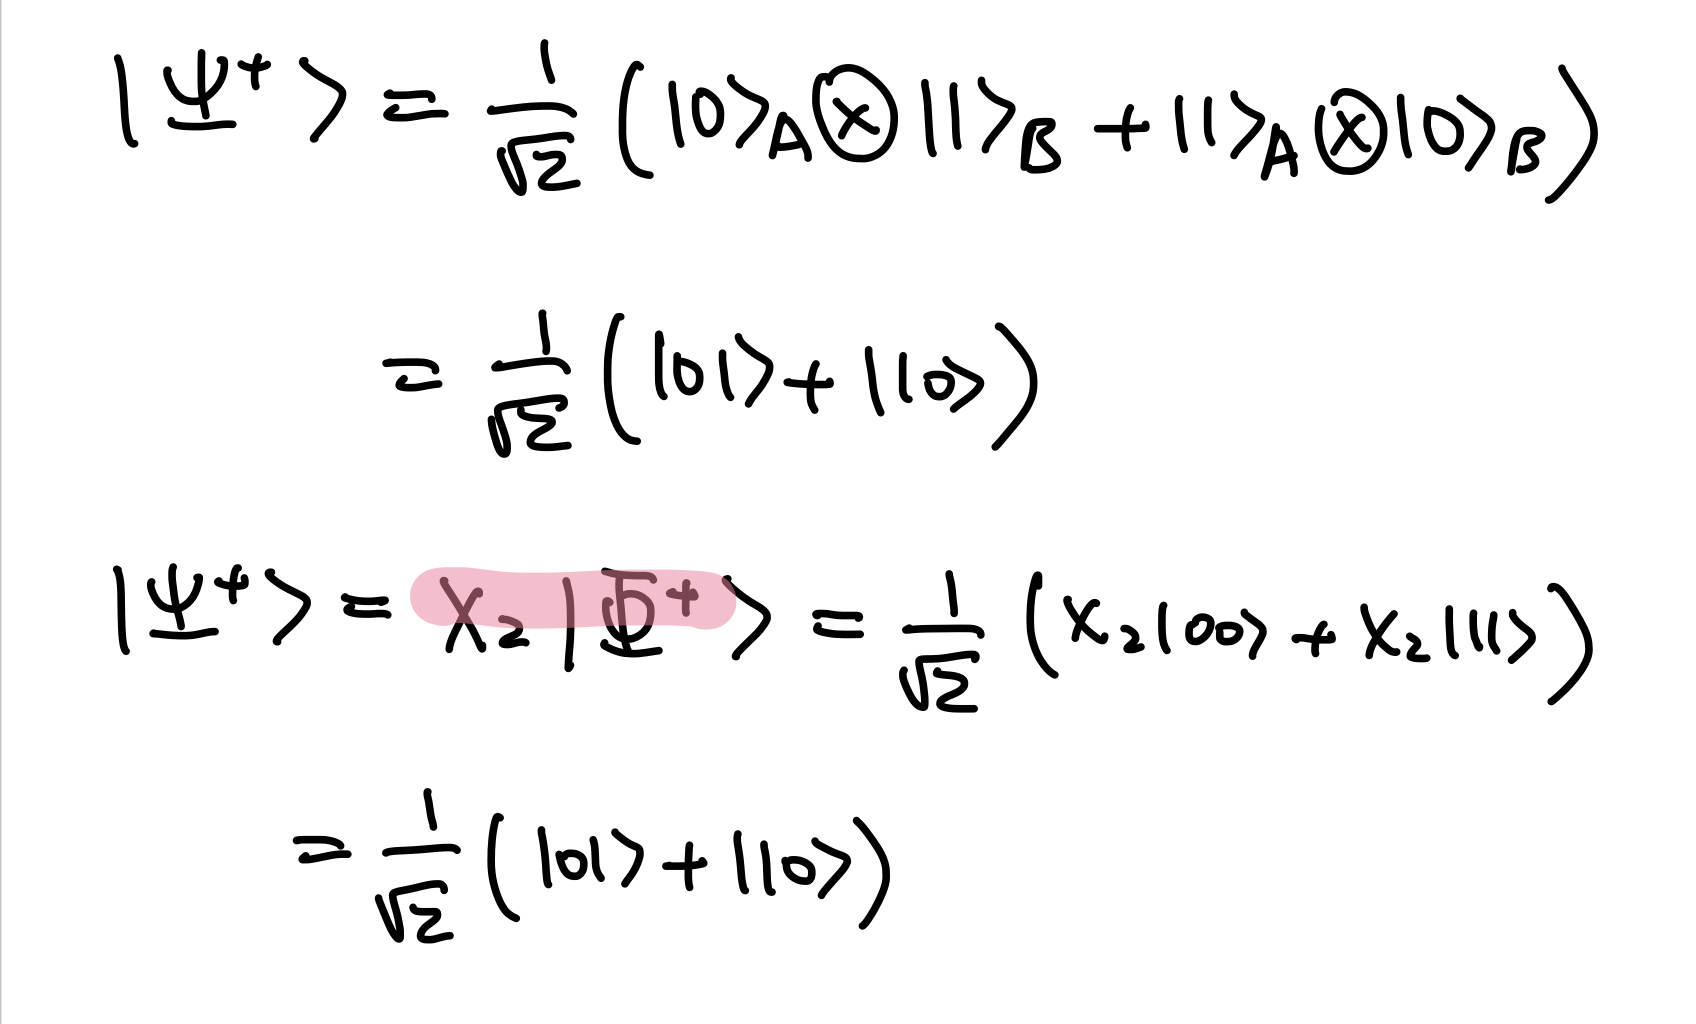

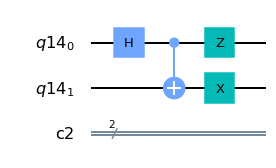

In [12]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.z(qr[0])
qc.x(qr[1])
qc.draw(output = 'mpl')

In [13]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()

In [14]:
print(out)

[ 0.        +0.j -0.70710678+0.j  0.70710678+0.j -0.        +0.j]


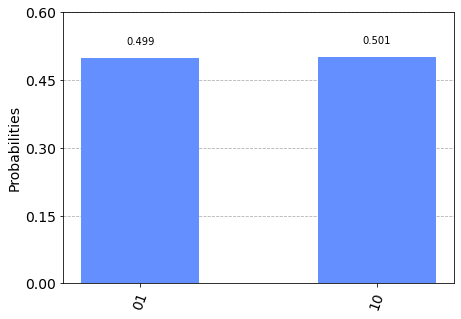

In [15]:
qc.measure(qr,cr)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend).result()
plot_histogram(job.get_counts(qc))

# Bell State 4

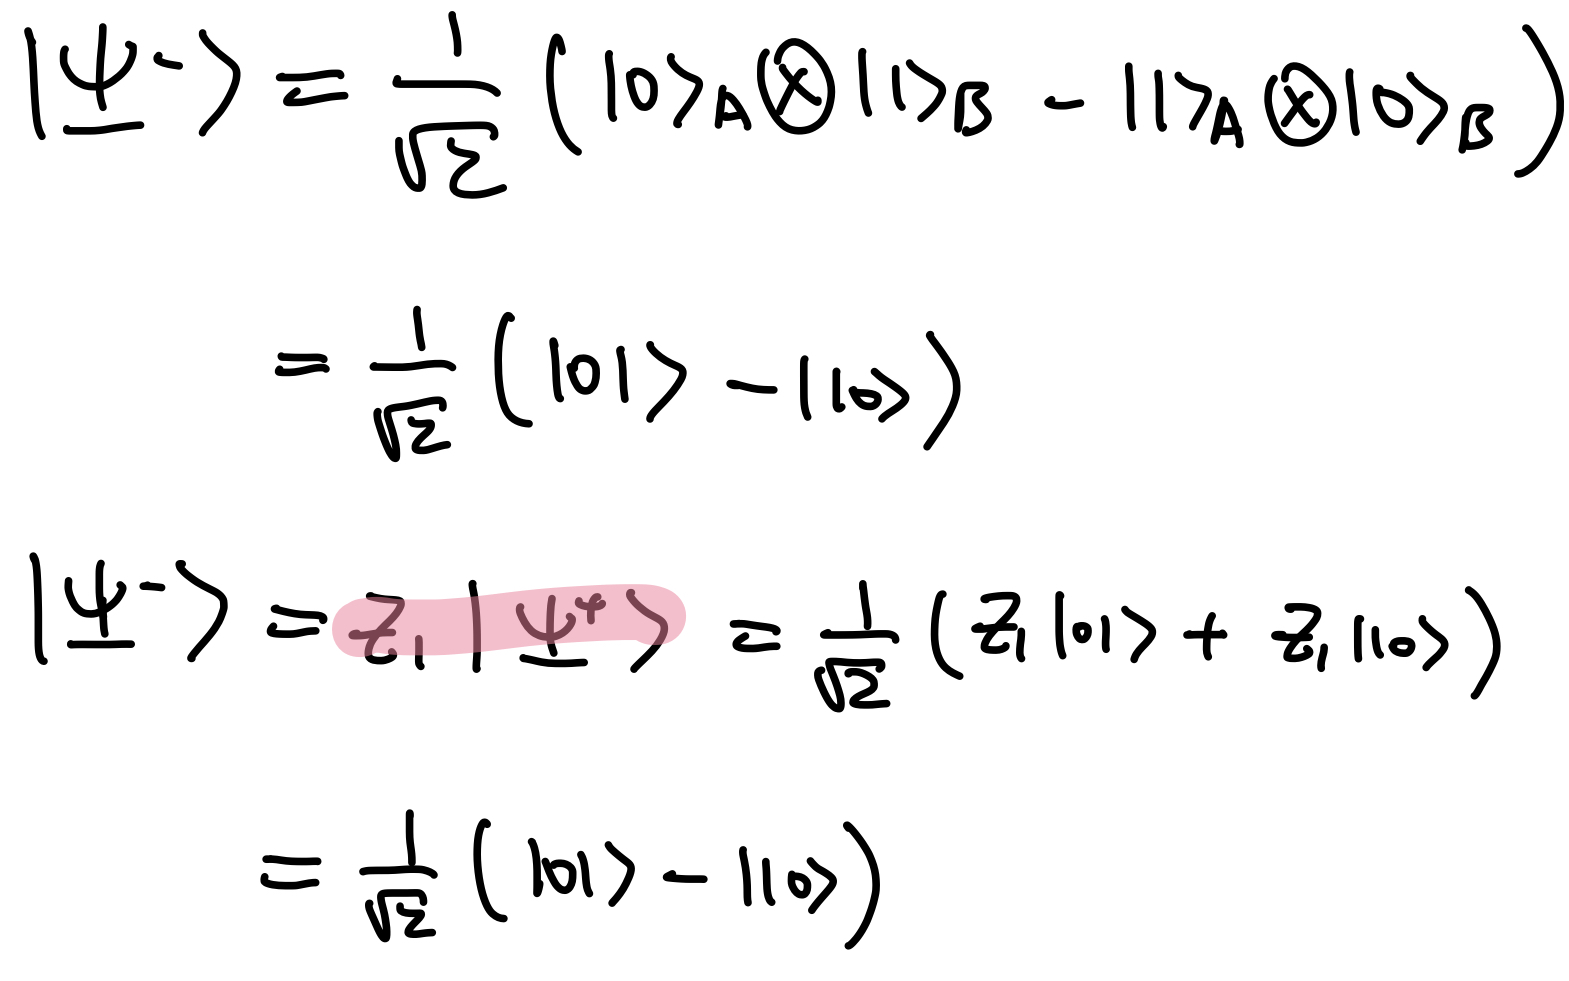

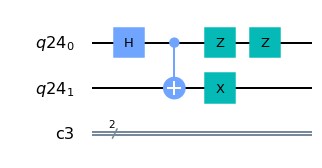

In [16]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.z(qr[0])
qc.x(qr[1])
qc.z(qr[0])
qc.draw(output = 'mpl')

In [17]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()

In [18]:
print(out)

[0.        +0.j 0.70710678-0.j 0.70710678+0.j 0.        -0.j]


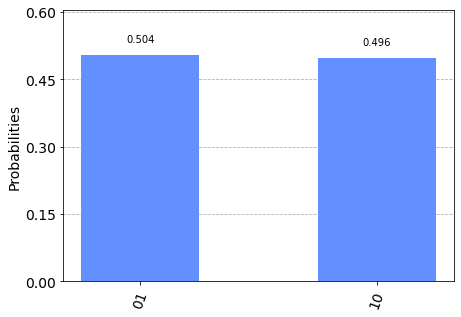

In [19]:
qc.measure(qr,cr)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend).result()
plot_histogram(job.get_counts(qc))

From the above circuit diagram, we need $H, Z, X, CNOT$ to make Bell State. Now we want to represent these gates in terms of unitary rotational gate, like $R_x, R_y, CNOT$. From the task requirement, we want Bell State 3, so let's work it out based one the above gates operation. First of all, we need to represent $H$ gate in terms of $R_x$ and $R_y$. I can make use of the below generalized Unitary operation formula to the representation of $H$.

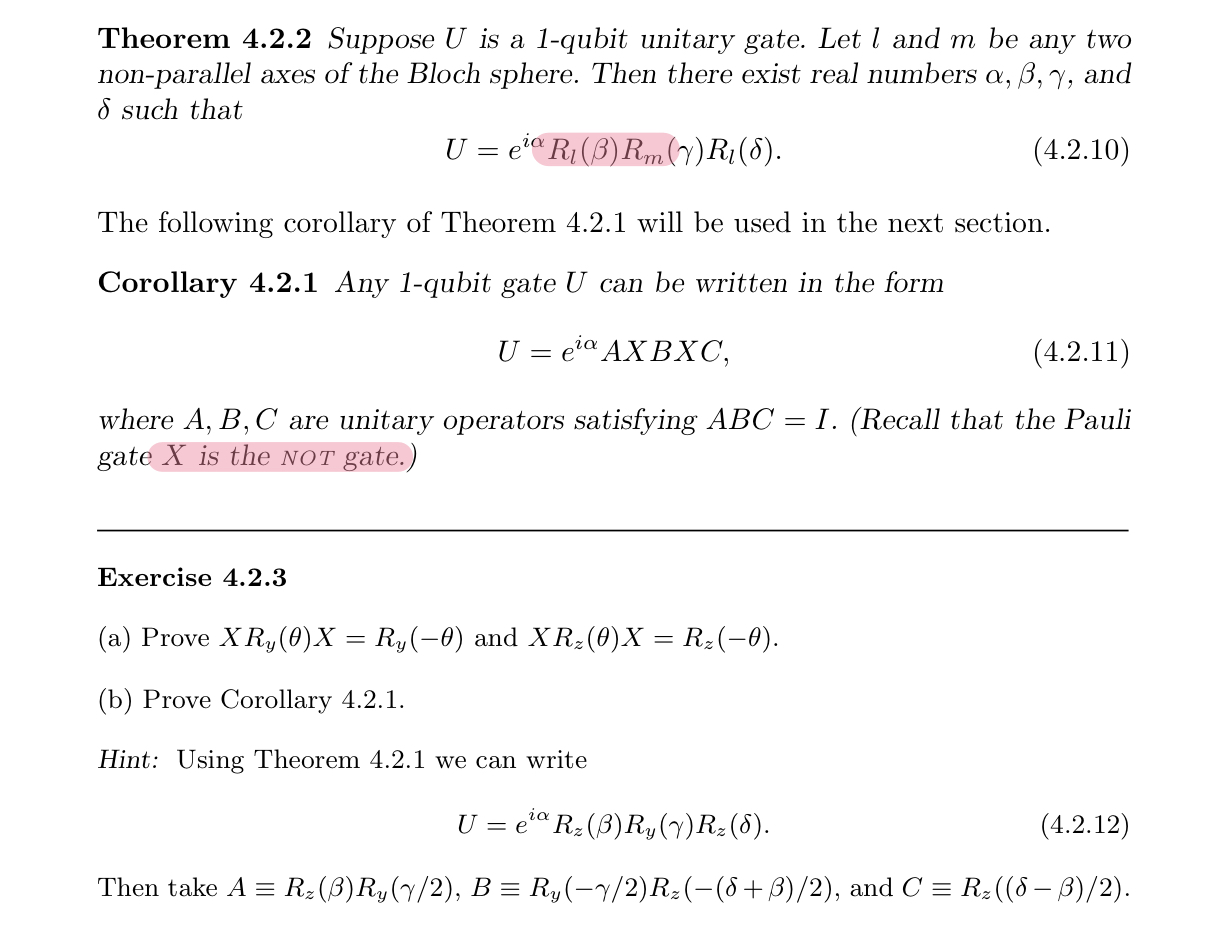

In [20]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [21]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [22]:
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.draw()

┌───┐
q24_0: ┤ H ├
       └───┘
q24_1: ─────

In [23]:
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

$$H = R_y(\frac{5\pi}{8})R_x(\pi)R_y(\frac{\pi}{8})$$

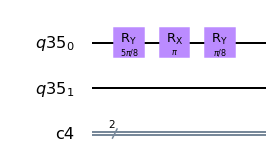

In [24]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.ry(5*pi/8, qr[0])
qc.rx(pi, qr[0]) 
qc.ry(pi/8, qr[0])
qc.draw(output='mpl')

In [25]:
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.70710678+0.00000000e+00j,  0.70710678+2.27422886e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j, -0.70710678-2.27422886e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678+2.27422886e-16j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678-2.27422886e-16j]])

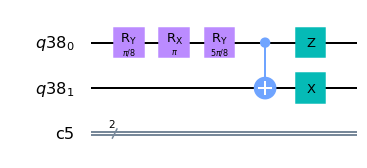

In [26]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.ry(pi/8, qr[0])
qc.rx(pi, qr[0])
qc.ry(5*pi/8, qr[0])
qc.cx(qr[0],qr[1])
qc.z(qr[0])
qc.x(qr[1])
qc.draw(output = 'mpl')

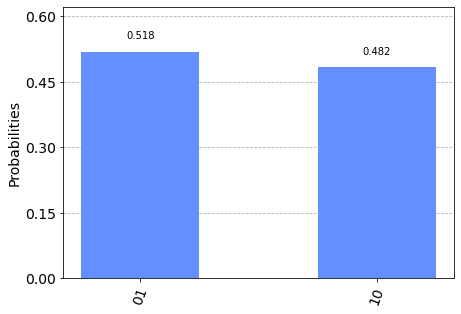

In [27]:
qc.measure(qr,cr)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend).result()
plot_histogram(job.get_counts(qc))

$$H = R_y(\frac{\pi}{4})R_x(\pi)R_y(\frac{-\pi}{4})$$

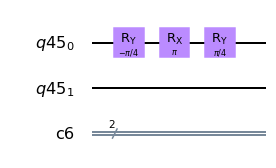

In [28]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.ry(-pi/4, qr[0])
qc.rx(pi, qr[0]) 
qc.ry(pi/4, qr[0])
qc.draw(output='mpl')

In [29]:
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.70710678+0.00000000e+00j, -0.70710678+1.57009246e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [-0.70710678-4.00614097e-16j, -0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+1.57009246e-16j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        -0.70710678-4.00614097e-16j, -0.70710678-8.65956056e-17j]])

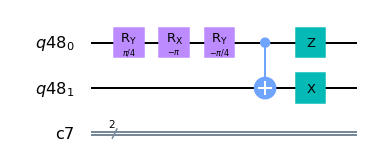

In [30]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.ry(pi/4, qr[0])
qc.rx(-pi, qr[0]) 
qc.ry(-pi/4, qr[0])
qc.cx(qr[0],qr[1])
qc.z(qr[0])
qc.x(qr[1])
qc.draw(output = 'mpl')

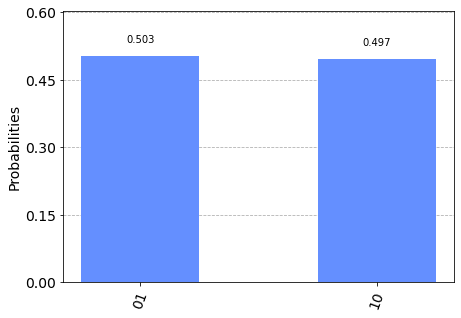

In [31]:
qc.measure(qr,cr)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend).result()
plot_histogram(job.get_counts(qc))

Although the $R_y(\frac{5\pi}{8})R_x(\pi)R_y(\frac{\pi}{8}) \neq H = R_y(\frac{\pi}{4})R_x(\pi)R_y(\frac{-\pi}{4})$ , both yields the same result of the Bell state with nearly equal probability

# Quantum Machine Learning (updated from time to time)

The above anyltical method can definitely help us to find the bell state, in terms various gates. However, we need to do alegrbaric calculation before we can encode and verify the state. It will be time consuming if we work on more complicated quantum state that we can no longer calculate by hand. From the above unitary operation, we found that there are 2 sets of paramertrized cicuit that can be used to find the Bell State 3, however, which one should be the optimal parametrizd one? Therefore, we need a more intelligent method to help us find the desired state and now I introduce gradient descent to find the global minimum for our optimal circuit parameter.

## Paramaterized Quantum Circuit

<p style='text-align: justify;'> 
Quantum Device, qml.device( ) is a computational object that we can apply opertaion featured in quantum mechanics, the result then returned from the measurement. Here we use the "default.qubit" to inidicate the pure state qubit simulator in pennyLane, while wires = 2 corresponds to the number of qubits, i.e. 2 for Bell state.
    </p>

In [ ]:
dev = qml.device('default.qubit', wires = 2, shots = 1000)

*Note*: 

PennyLane uses the term `wires` to refer to a quantum subsystem for most devies, this corresponds to a qubit. For continous-variable devices, a wire corresponds to a quantum mode.

`shots` refers to the number of evaluation of the quantum circuit to estimate the expectation values. Defaults to 1,000 if not specified.
    
`analytic` indicates if the device should calculate expectations and variance analytically. It is only possible with simulator devices. Defaults to `True`. 
</p>

<p style='text-align: justify;'> 
In PennyLane, quantum computations are represented as quantum node objects. We can see below the @qml.qnode( ) are encapsulating the quantum function which is described by quantum circuit to declare it. They are bound to a particular quantum device to evaluate expectation value and varience of the circuit. By using @qml.qnode( ), we tell pennylane that the circuit is implemented on a quantum device. In the function, we apply unitary rotational gates, like $R_x$, $R_y$, $CNOT$ on the pure state $|0>$. Then we make measurement and calculate the expected value of $\sigma_z$.
    </p>

In [ ]:
#def from_qiskit(quantum_circuit):
 #   qc = qiskit.QuantumCircuit(2)
  #  qc.rx(0,[0])
   # qc.ry(0,[0])
#my_circuit = qml.from_qiskit(qc)

In [ ]:
#qr = QuantumRegister(2)
#cr = ClassicalRegister(2)
#qc = QuantumCircuit(qr, cr)

In [ ]:
#import pennylane as qml

#def my_quantum_function(x, y):
 #   qml.RZ(x, wires=wire1)
  #  qml.CNOT(wires=[wire1,wire2])
   # qml.RY(y, wires= wire2)
    #return qml.expval(qml.PauliZ(1))

In [ ]:
@qml.qnode(dev, interface='autograd')

def generateCircuit(params):
    qml.RX(params[0],wires = 0) # Rx is applied with the 1st parameter, on the first qubit
    qml.RY(params[1],wires = 0) # Ry is applied with the 2nd parameter, on the first qubit
    qml.CNOT(wires = [0, 1]) # CNOT is applied on the first and second qubit
    #my_circuit(wires = (1,0))
    return qml.expval(qml.PauliZ(0)) #qml.expval(qml.PauliZ(1))#qml.sample(qml.PauliZ('wire1')) qml.sample(qml.PauliZ('wire2'))

In [ ]:
#@qml.qnode(dev)
#def circuit(param):
 #   qml.RX(param, wires=0)
  #  qml.CNOT(wires=[0, 1])
   # return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

In [ ]:
#print(circuit(np.pi / 2))

*Note*:

The bridge between the quantum and classical worlds is provided in PennyLane via interfaces. There are *Numpy, PyTorch, TensorFlow* to make the libraries quantum-aware. If no interface is specified, Pennylane will default to the NumPy interface. 

Numpy interface provides added benefits of automatic differentiation, backpropapation of classical computations, powered by *autograd*.

### Initialize the parameters

The parameters $\theta_1$ & $\theta_2$ are initialized. We need to check if we obtain the right unitary rotation on applying the circuit.

In [ ]:
params =[1.570796327,1.570796327]
generateCircuit(params)

In [ ]:
params = [0, 0]
generateCircuit(params)

In [ ]:
params = [0,0.5]
generateCircuit(params)

### Draw Quantum Circuit

We print out the gate applied by QNode after each evaluation.

In [ ]:
generateCircuit.print_applied()

Circuit drawer can be used in the following way:

In [ ]:
#result = circuit(params)
#result.shape

In [ ]:
#np.all(result['wire1'] == result['wire2'])

In [ ]:
result = generateCircuit(params)
print(generateCircuit.draw())

### Calculate the Gradient Descent


We use the above quantum device `dev` to calculate the gradient of the function `circuit` that is encapsulated in the decorator `qnode`. The grdaient function `.grad()` is to find the vector parital derivatives of the circuit. `argnum` is the length of the bar that is set to zero as the function `circuit` takes one input parameter `params`.


In [ ]:
#dcircuit = qml.grad(circuit, argnum=0)
#print(dcircuit([0, 0]))

In [ ]:
print(generateCircuit.draw())

The above shows that $\theta_1 = \theta_2 = 0$, so the derivative of the expected value of the circuit should be 0. This resembles to the caulated results.

We can evaulate the this gradient function at specific parameter values.

In [ ]:
#dcircuit([params[0], params[1]])

PennyLane know which arguments of a quantum funtion to differentiate and which to ignore. All positional arugments provided to the QNode are assumed to be differentiable by default. We need all arrays created by PennyLane NumPy module have a speical flag `requres_grad` specifying whether they are trainable or not 

### Defining cost function and initial parameters

We here 

In [ ]:
def cost(x):
    return generateCircuit(x)

In [ ]:
init_params = np.array([0.11, 0.5])
cost(init_params)

### Optimizing the cost function using gradient descent

We use an intance of the function GradientDescentOptimizer to perform gradient descent. The hyperparameter of this optimization are step size and initial parameters. This stepsize denotes how big is the step to move every iteration.

In [ ]:
opt = qml.GradientDescentOptimizer(stepsize=0.4)  # initialise the optimizer
steps = 100  # maximum the number of steps taken
params = init_params # set the initial parameter values
# running the optimization
for i in range(steps):
    params = opt.step(cost,params) # update parameter after every iteration.
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

We observe that it only takes 10 iteration for the cost reduced to -0.99, which is rather quick. We also observe that the optimized rotation angles are $\theta_1 = 0, \theta_2 = 0$.
This makes sense becuase $\cos0\cos\pi = -1$, which is the global minimum value. 

# From Cirq Method 

In [ ]:
def simulateCircuit(simulatedCircuit, reps):
  result = simulator.run(simulatedCircuit, repetitions=reps)
  return result

In [ ]:
# Define the number of repetitions (reps[0] is 1)
reps = [1, 10, 100, 1000]

In [ ]:
def getCount(result, reps):
  count0 = (result.data.groupby(["0", "1"]).size().reset_index(name="Count"))['Count'][0]
  count1 = reps-count0
  return count0


  return count0/reps

In [ ]:
def getError(result, reps):
  count0 = (result.data.groupby(["0", "1"]).size().reset_index(name="Count"))['Count'][0]
  alpha0 = count0/reps
  error = abs(alpha0-0.5)
  return error

In [ ]:
aerror = 0.005

In [ ]:
# set stepsize to 1% of the range, 0.01*2*np.pi
stepsize = 0.01

In [ ]:
# calculate the partial derivatives
def getDelY(circuit, reps, stepsize):
  # simulate previous circuit
  result = simulateCircuit(circuit, reps)
  alphaOld = getAlpha(result, reps)

In [ ]:
  # simualte new circuit with thetaRX+stepsize, calculate alpha
  circuit = generateCircuit(params) #[0]+stepsize, params[1]
  result = simulateCircuit(circuit, reps)
  alphaNewTRX = getAlpha(result, reps)

## Try another method

We now set up a quantum circuit where we allow the gates to be specified with the `generators` keyword, which is a list of generators of rotation that will be used for the gates in the circuit. A helper method `RGen` returns the correct unitary gate according to the rotation specified by an element of `generators`. As requested in the question, we don't need RZ rotation acting on the cirucit.

In [ ]:
def RGen(param, generator, wires):
    if generator == "X":
        qml.RX(param, wires = wires)
    elif generator == "Y":
        qml.RY(param, wires = wires)

In [ ]:
def ansatz_rsel(params, generators):
    RGen(params[0], generators[0], wires = 0)
    RGen(params[1], generators[1], wires = 1)
    qml.CNOT(wires = [0, 1])

In [ ]:
@qml.qnode(dev)
def circuit_rsel(params, generators = None):
    ansatz_rsel(params, generators)
    return qml.expval(qml,PauliZ(0)), qml.expval(qml.PauliY(1))

In [ ]:
@qml.qnode(dev)
def circuit_rsel2(params, generators=None):  # generators will be passed as a keyword arg
    ansatz_rsel(params, generators)
    return qml.expval(qml.PauliX(0))

In [ ]:
def cost_rsel(params, generators):
    Z_1, Y_2 = circuit_rsel(params, generators=generators)
    X_1 = circuit_rsel2(params, generators=generators)
    return 0.5 * Y_2  - 0.2 * X_1

### Helper Method

We define helper method as follow. We need to iterate through the possible gate choices in addition to optimizing each parameter.

# Reference:

## On Pennylane
1. Gradient Descent
https://rohithkrishna.in/2020-09-11-qubit-rotation-gradient-descent
2. Gradien Descent on pdf
https://rohithkrishna.in/files/pdf/2020-09-11-qubit-rotation-gradient-descent.pdf
2. qml documentation
https://pennylane.readthedocs.io/en/stable/code/qml.html
3. Presentation
https://av.tib.eu/media/44477
4. Quantum Circuit Structural Learning
https://pennylane.ai/qml/demos/tutorial_rotoselect.html
5. Quantum Circuit
https://pennylane.readthedocs.io/en/stable/introduction/circuits.html
6. Advanced Usage
https://pennylane.ai/qml/demos/tutorial_advanced_usage.html

## On Github Resource
1. Bell State Generation
https://github.com/amitjamadagni/QCM/blob/master/Bell_state_generation.ipynb
2. Vanilla Gradient Descent and Quantum Natural Gradient Descent
https://github.com/hsim13372/quantum_natural_gradient/blob/master/single_qubit_vqe/single_qubit_rotations.ipynb
3. Entanglement
https://github.com/kelzheng/QC-Mentorship/blob/master/QC_Mentorship.ipynb
4. Determine the lowest eigenvalue of the matrix using the variational quantum eigensolver method https://github.com/OscarJHernandez/qc_mentorship_task/blob/master/QC-Mentorship%20Assignment.ipynb
5. Awesome Quantum Machine Learning
https://github.com/krishnakumarsekar/awesome-quantum-machine-learning#introduction-why-quantum-machine-learning

## On Qiskit
1. qml.from_qiskit
https://pennylane.readthedocs.io/en/stable/_modules/pennylane/io.html#from_qiskit
2. Hybrid quantum-classical Neural Networks with PyTorch and Qiskit
https://qiskit.org/textbook/ch-machine-learning/machine-learning-qiskit-pytorch.html
3. Qiskit Aer simulator backends
https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html
4. Analytic Quantum Gradient Descent (AQGD) optimizer
https://qiskit.org/documentation/stubs/qiskit.aqua.components.optimizers.AQGD.html
5. Source code for qiskit.aqua.components.optimizers
https://qiskit.org/documentation/_modules/qiskit/aqua/components/optimizers/aqgd.html
6. Qiskit Visualizations
https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html
7. Source code for qiskit.optimization.algorithms.recursive_minimum_eigen_optimizer
https://qiskit.org/documentation/_modules/qiskit/optimization/algorithms/recursive_minimum_eigen_optimizer.html
8. Adding quantum gradient descent class aqgd
https://github.com/Qiskit/qiskit-aqua/pull/408
9. Optimizier
https://sooluthomas.github.io/testTranslation/aqua/optimizers.html
10. How to implement the 4 Bell states on the IBM Q (composer)?
https://quantumcomputing.stackexchange.com/questions/2258/how-to-implement-the-4-bell-states-on-the-ibm-q-composer
11. Single Qubit Gate
https://qiskit.org/textbook/ch-states/single-qubit-gates.html

## Research Paper
1. Efficient evaluation of quantum observables using entangled measurements
https://www.nature.com/articles/s41534-020-0284-2
2. Quantum Circuit Learning
https://arxiv.org/pdf/1803.00745.pdf
3. Evaluating analytic gradients on quantum hardware
https://arxiv.org/pdf/1811.11184.pdf

## On Python Knowledge
1. arg num
https://pymbook.readthedocs.io/en/latest/modules.html
2. Argument Definition
https://www.geeksforgeeks.org/args-kwargs-python/

## On Jupyter Notebook
1. Draw Quantum Circuit
https://discuss.pennylane.ai/t/any-way-to-draw-my-quantum-circuit/290
2. Alignment in Markdown Text
https://stackoverflow.com/questions/35077507/how-to-right-align-and-justify-align-in-markdown/43070925
3. Format text in Jypter Notebook with Markdown
https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/

## My Enquiry on PennyLane Forum
1. Optimiziation Error:
https://discuss.pennylane.ai/t/optimization-error/109/3
2. Combined measurement results and error on numpy
https://discuss.pennylane.ai/t/combined-measurement-results-and-error-on-numpy/595
3. ‘function’ object has no attribute ‘PauliZ
https://discuss.pennylane.ai/t/function-object-has-no-attribute-pauliz/279
4. Gradient Descent of real scalar-output function 
https://discuss.pennylane.ai/t/gradient-descent-of-real-scalar-output-function/596
5. Problem with printing the result with the parameter naming: ‘Variable’ object is not subscriptable 
https://discuss.pennylane.ai/t/problem-with-printing-the-result-with-the-parameter-naming-variable-object-is-not-subscriptable/598

## QC Mentorship Program
1. https://docs.google.com/document/d/1Ow3v8Y4rYBdgxXNxKV9ZUAM4bwL6211U6DWCcByZ4A4/edit
2. https://docs.google.com/forms/d/e/1FAIpQLSeof4roYaazG9v4u7_vHKWsSmqnpzOECzRvvMtpDuAepB_R5A/viewform
3. https://docs.google.com/document/d/1lo_qy6Y7jhwBMWpQuecxAFG3L_4soYkpq0TaLq42o-A/edit
4. https://qosf.org/cohort_1/

## In General
1. But what is a Neural Network? | Deep learning, chapter 1
https://www.youtube.com/watch?v=aircAruvnKk&t=22s
2. Feedforward Neural Network https://en.wikipedia.org/wiki/Feedforward_neural_network

2. Quantum Computing Overview
https://www.phmsociety.org/sites/phmsociety.org/files/Keynote_Dr.%20Sunil%20Dixit%20QC%20Presentation%20PHM%20Society%202018.pdf
3. Quanutm Computing Coding
http://www-users.cselabs.umn.edu/classes/Spring-2020/csci5451/FILES/LecN19_R.pdf
4. Two Qubit Entanglement and Bell Inequalities
https://inst.eecs.berkeley.edu/~cs191/fa08/lectures/lecture2.pdf
5. Resource on Quanutm Information and Processing
https://viterbi-web.usc.edu/~tbrun/
6. Gates for a single qubit
http://math.utoledo.edu/~codenth/Spring_15/4350/HW/hw05.pdf